In [9]:
import pandas as pd
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

In [10]:
TRAINDIR = 'data\\Covid19-dataset\\train'
TESTDIR = 'data\\Covid19-dataset\\test'

In [11]:
train_data = ImageDataGenerator(rescale=1/255.0, validation_split=0.2)
test_data = ImageDataGenerator(rescale=1/255.0)

In [12]:
train_set = train_data.flow_from_directory(
    TRAINDIR,
    batch_size=32,
    target_size=(224,224)
)

test_set = test_data.flow_from_directory(
    TESTDIR,
    batch_size=32,
    target_size=(224,224)
)

Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


In [13]:
model = Sequential()
model.add(Conv2D(64, 3, input_shape=(224,224,3)))
model.add(Conv2D(64, 3, input_shape=(224,224,3)))
model.add(MaxPool2D(pool_size=(2,2), strides=2))
model.add(Flatten())
model.add(Dense(64))
model.add(Dense(32))
model.add(Dense(3, activation='softmax'))

In [14]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy'],
    loss='categorical_crossentropy'
)

In [15]:
history = model.fit(
    train_set,
    epochs=15,
    validation_data=test_set
)

Epoch 1/15
8/8 [==============================] - 41s 5s/step - loss: 275.7332 - accuracy: 0.3386 - val_loss: 119.3788 - val_accuracy: 0.3939
Epoch 2/15
8/8 [==============================] - 38s 5s/step - loss: 79.3858 - accuracy: 0.4661 - val_loss: 102.2552 - val_accuracy: 0.3182
Epoch 3/15
8/8 [==============================] - 39s 5s/step - loss: 32.9213 - accuracy: 0.6215 - val_loss: 36.2716 - val_accuracy: 0.6667
Epoch 4/15
8/8 [==============================] - 39s 5s/step - loss: 15.0827 - accuracy: 0.8367 - val_loss: 42.3933 - val_accuracy: 0.6061
Epoch 5/15
8/8 [==============================] - 38s 5s/step - loss: 10.1392 - accuracy: 0.8645 - val_loss: 10.3151 - val_accuracy: 0.8030
Epoch 6/15
8/8 [==============================] - 38s 5s/step - loss: 3.7008 - accuracy: 0.8964 - val_loss: 9.1670 - val_accuracy: 0.8182
Epoch 7/15
8/8 [==============================] - 38s 5s/step - loss: 2.9899 - accuracy: 0.9203 - val_loss: 3.3069 - val_accuracy: 0.8485
Epoch 8/15
8/8 [=====

<Axes: title={'center': 'Own CNN loss curve'}, xlabel='Epochs'>

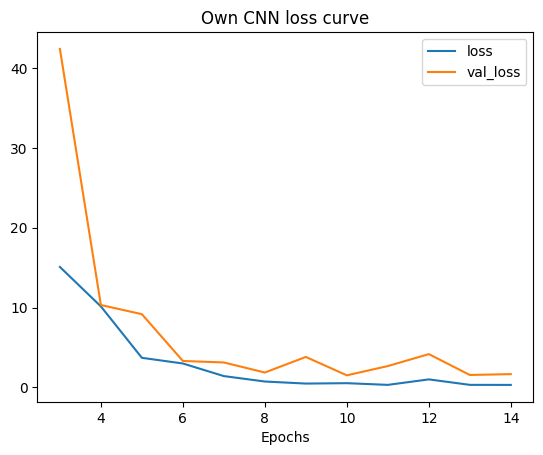

In [16]:
df = pd.DataFrame(history.history)
df[['loss','val_loss']][3:].plot(title='Own CNN loss curve', xlabel='Epochs')